In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')
print(11)

11


In [26]:
class Support_Vector_Machine:
    def __init__(self, visualization=True):
        # se empieza a crear el grafico
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            #self.fig.show()
    
    # train
    def fit(self, data):
        #print("data:",data)
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]
        #print("############################### 1 ##")
        # finding values to work with for our ranges.
        all_data = [] #esto va almacenar todos los datos de las X del dataset
        for yi in self.data: #for labels in dataset
            #print("----------------------")
            #print("label y:",yi)
            #print("----------------------")
            for featureset in self.data[yi]: #for vector x in dataset
                #print("featureset:",featureset)
                for feature in featureset: #for x in vector x
                    all_data.append(feature)
        #print("\nall_data:",all_data)
        #print("############################### 2 ##")
        # oṕtendremos el valor maximo y minimo del dataset
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        #print("max_feature_value:",self.max_feature_value)
        #print("min_feature_value:",self.min_feature_value)
        # no need to keep this memory.
        all_data=None
        
        # step_sizes son los learning rate para w
        step_sizes = [self.max_feature_value * 0.1, 
                      self.max_feature_value * 0.01,
                      #point of expense
                      self.max_feature_value * 0.001] # starts getting very high cost after this.
        #print("step_sizes:",step_sizes)
        
        #learning rate para b
        # extremely expensive
        b_range_multiple = 5
        b_multiple = 5
        latest_optimum = self.max_feature_value*10 #primer valor de w
        #print("############################################ 3 ##")
        
        for step in step_sizes: #por cada learning rate de w
            #print("---------------------------")
            #print("step:", step)
            #print("---------------------------")
            w = np.array([latest_optimum,latest_optimum]) #crea el vector w usando el valor max * 10 en ambas dimenciones
            #print("w:",w)
            # we can do this because convex
            optimized = False
            #print(" ############################### b")
            #print("   b range: ",-1*(self.max_feature_value*b_range_multiple),"-",(self.max_feature_value*b_range_multiple))
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    #print("**********************")
                    #print("**********************")
                    #print("b",b)
                    #print("******************")
                    #print("**********************")
                    for transformation in transforms: #por cada forma posible de cada w
                        #print("||||||||||||||||||||||")
                        #print("transformation", transformation)
                        w_t = w*transformation # w multiplicado por la tranformacion
                        #print("w_t", w_t)
                        #print("----------------------")
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data: # por cada label en el dataset
                            #print("i:",i)
                            for xi in self.data[i]: # por cada vector de x en el dataset
                                #print("-----------------")
                                #print("xi:",xi)
                                yi=i # etiqueda de y del vector actual de x
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    #print("no es >=1")
                                    found_option = False
                                #else:
                                    #print("si es >=1")
                                    
                        if found_option:
                            # np.linalg.norm(w_t) devuelve la amgnitud del vector
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b] # si esto if not yi*(np.dot(w_t,xi)+b) >= 1: no se cumple se entra aqui
                            #print("opt_dict:",opt_dict)
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step
                    
            #print("##################")
            #print("opt_dict:",opt_dict)
            #print("[n for n in opt_dict]:",[n for n in opt_dict])
            #print("##################")
            norms = sorted([n for n in opt_dict]) # se guardan en esta lista todos los keys de opt_dict que son w_t
                                                  # en orden ascendente
            #||w|| : [w,b]
            #print("norms:",norms)
            #print("norms[0]", norms[0])
            opt_choice = opt_dict[norms[0]] # se guarda el contenido de opt_dict donde la key es menor
            #print("opt_choice:",opt_choice)
            self.w = opt_choice[0] # se guarda el vector w_t con menor magnitud
            self.b = opt_choice[1] # se guarda el b donde se cumplio el requizito de found_option
            #print("opt_choice[0][0]:",opt_choice[0][0])
            latest_optimum = opt_choice[0][0]+step*2
            
    def predict(self,features):
        # classifiction is just:
        # sign(xi.w+b)
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        #print("features:",features)
        #print("classification:",classification)
        # if the classification isn't zero, and we have visualization on, we graph
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0],features[1],s=200,marker='*', c=self.colors[classification])
        else:
            print('featureset',features,'is on the decision boundary')
        return classification
    
    def visualize(self):
        #scattering known featuresets.
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # w.x + b = 1
        # pos sv hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max], [psv1,psv2], "k")
        
        # w.x + b = -1
        # negative sv hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max], [nsv1,nsv2], "k")

        # w.x + b = 0
        # decision
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max], [db1,db2], "g--")

        plt.show()

In [27]:
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

Optimized a step.
Optimized a step.
Optimized a step.


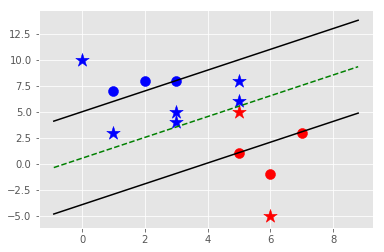

In [28]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)

svm.visualize()

In [ ]:
print(444444444444)